<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

df = pd.read_csv("Preprocessed_dataset.csv")

target_col = "GradeClass"
X = df.drop(columns=[target_col])
y = df[target_col]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2392, 18)
Shape of y: (2392,)


In [7]:
partition_sizes = [0.6, 0.7, 0.8]  # نسبة التدريب (train_size)
criteria = ["gini", "entropy"]

results_clf = []  # نخزن فيه النتائج لجل التقرير

for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=42, stratify=y
    )

    for crit in criteria:
        clf = DecisionTreeClassifier(
            criterion=crit,
            random_state=42
        )
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)

        print("=" * 60)
        print(f"Train size = {int(train_size*100)}% | Criterion = {crit}")
        print("Accuracy:", round(acc, 4))
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))

        results_clf.append({
            "train_size": train_size,
            "criterion": crit,
            "accuracy": acc,
            "depth": clf.get_depth(),
            "n_leaves": clf.get_n_leaves()
        })


Train size = 60% | Criterion = gini
Accuracy: 0.9248

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.60      0.66        43
         1.0       0.81      0.85      0.83       108
         2.0       0.90      0.95      0.93       156
         3.0       0.92      0.91      0.91       166
         4.0       0.98      0.97      0.97       484

    accuracy                           0.92       957
   macro avg       0.87      0.86      0.86       957
weighted avg       0.92      0.92      0.92       957

Confusion Matrix:
[[ 26   6   2   6   3]
 [  5  92   4   4   3]
 [  2   1 148   2   3]
 [  1   7   6 151   1]
 [  2   8   4   2 468]]
Train size = 60% | Criterion = entropy
Accuracy: 0.9216

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.60      0.64        43
         1.0       0.88      0.83      0.86       108
         2.0       0.90      0.96      0.93       156
   

In [8]:
results_clf_df = pd.DataFrame(results_clf)
results_clf_df


,train_size,criterion,accuracy,depth,n_leaves
0,0.6,gini,0.924765,11,63
1,0.6,entropy,0.921630,11,70
2,0.7,gini,0.933148,11,81
3,0.7,entropy,0.927577,9,79
4,0.8,gini,0.914405,11,87
5,0.8,entropy,0.922756,11,85


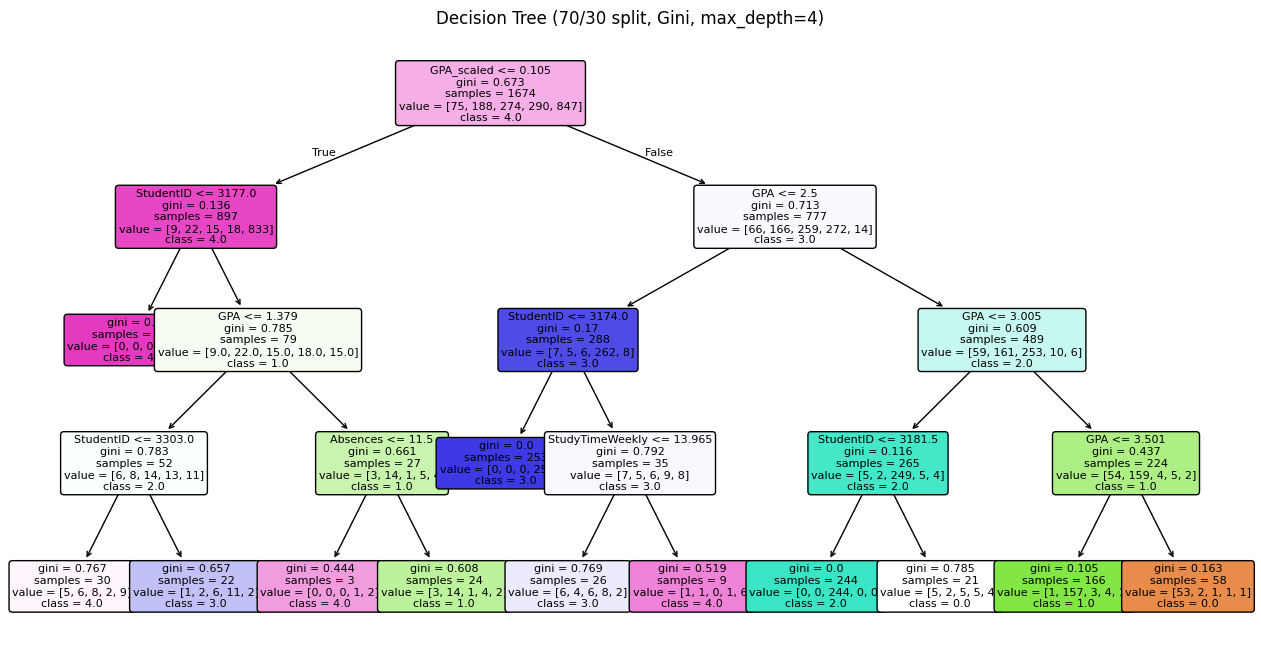

In [9]:
# نبني شجرة وحدة بأفضل إعداد (مثال: 70% train, gini)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42, stratify=y
)

best_clf = DecisionTreeClassifier(criterion="gini", random_state=42, max_depth=4)
best_clf.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(
    best_clf,
    feature_names=X.columns,
    class_names=[str(c) for c in np.unique(y)],
    filled=True, rounded=True, fontsize=8
)
plt.title("Decision Tree (70/30 split, Gini, max_depth=4)")
plt.show()
